说到正则化大家应该都不陌生，这个在机器学习和深度学习中都是非常常见的，常用的正则化有L1正则化和L2正则化。提到正则化大家就会想到是它会将权重添加到损失函数计算中来降低模型过拟合的程度。了解更多一点的同学还会说，L1正则化会让模型的权重参数稀疏化(部分权重的值为0)，L2正则化会让模型的权重有趋于0的偏好。

不知道大家有没有想过为什么L1正则化会让部分权重的值为0？为什么L2正则化会让权重会有偏向于0？为什么正则化可以防止过拟合？正则化究竟是怎么来的？ 带着这些问题，我们来看这篇文章，会帮助大家一一解答。

# 正则化的由来
在介绍正则化之前，我们先来看一张图

In [42]:
import numpy as np

x = np.arange(-5,5)

y_1 = 3*x*x*x+2*x*x+x
y_2 = x*x*x+x*x+x
y_3 = 2*x*x+x

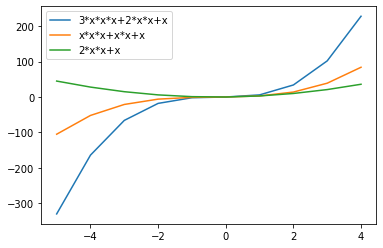

In [45]:
import matplotlib.pyplot as plt

plt.plot(x, y_1,label="3*x*x*x+2*x*x+x")
plt.plot(x, y_2,label="x*x*x+x*x+x")
plt.plot(x, y_3,label="2*x*x+x")
plt.legend()

上图中, 绘制了三条不同的曲线y1、y2、y3，从曲线函数值的变化不难看出:
- 蓝色`y1`变化最大，桔色`y2`和绿色`y3`平缓些
- 通过函数表达式可以看出，`y2`相对`y1`的自变量系数变小了，`y3`比`y1`少一个自变量项，可以理解为少的那个自变量的系数为0。

通常如果函数的取值变化的幅度更大，我们会认为函数更复杂，函数的方差更大。所以，上面的三个函数中，函数y1的复杂度最高。通过函数图像可以发现，降低自变量的系数值，或者减少函数自变量的个数等价于自变量的系数为0是可以降低函数复杂度的。

在构建模型之前，我们是不知道数据的分布，如果模型过于简单就会导致欠拟合，如果模型过于复杂就会过拟合。通常我们为了模型能够更好的拟合数据都是使得模型处于过拟合，为了降低模型的过拟合就需要使得模型部分权重为0或者降低模型的权重，所以我们会为损失函数添加一个惩罚项，数学表达式如下

$\tilde{J}(\theta;X,y)=J(\theta;X,y)+\alpha\Omega(\theta)$

- $J(\theta;X,y)$表示原目标函数, 没有添加正则化
- $\Omega(\theta)$表示模型参数的惩罚项
- $\alpha$表示惩罚项系数，越大正则化惩罚越大。

我们在对模型的参数做惩罚的时候，其实只是添加了模型的权重参数并不包括偏置参数，因为模型的偏置参数数量相对于权重参数数量来说要少的多，而且每个权重参数会指定两个变量如何相互作用，而偏置只是控制一个单一的变量，所以我们不对偏置做正则化也不会导致太大的方差。而且，如果对偏置进行正则化可能会导致明显的欠拟合。

上式中的参数$\theta$包含了权重和偏置，而我们只需要对权重做正则化。所以，L1和L2可以改成如下表达式:

$\tilde{J}(\omega;X,y)=J(\omega;X,y)+\alpha\Omega(\omega)$

$L1: \Omega(\omega)=||\omega||_1=\sum_{i=1}^N |\omega_i|$

$L2: \Omega(\omega)=||\omega||_2^2=\sum_{i=1}^N \omega_i^2$

# 正则化的影响
接下来, 我们来介绍一下为什么$l_1$正则化会使得模型的部分参数为0，$l_2$正则化会使得模型的参数接近0。

为了更好的证明，接下来的公式可能会有点多，不过我会尽可能的详细让大家更好的理解